# Room Occupancy Detection
The objective of this project is to use machine learning to predict whether a room is occupied based on various factors such as temperature, humidity, light, CO2 levels, and humidity ratio. The target variable, Occupancy, is binary and indicates whether the room is occupied or not.

In [20]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
#Now we will read in our dataset and take a look at it
df = pd.read_csv('RoomOccupancy_data.csv')
df.head(6)

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.7000,26.272,585.200000,749.200000,0.004764,1
1,23.7180,26.290,578.400000,760.400000,0.004773,1
2,23.7300,26.230,572.666667,769.666667,0.004765,1
3,23.7225,26.125,493.750000,774.750000,0.004744,1
4,23.7540,26.200,488.600000,779.000000,0.004767,1
5,23.7600,26.260,568.666667,790.000000,0.004779,1


## Data Cleaning and Pre-processing:

In [22]:
#How many rows and columns are we dealing with
df.shape

(2665, 6)

In [23]:
#Lets check for null values
df.isnull().sum()
#Looks good there are no no nulls

Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [24]:
#Now lets check for any duplicates
df.duplicated().sum()

np.int64(82)

In [25]:
#I have 82 duplicates as per the above cell...so lets clean this up.
df = df.drop_duplicates()
#and check again
df.duplicated().sum()

np.int64(0)

In [26]:
#Lets check our datatypes
df.dtypes
#Since everything is either a float or integer we should be pretty free to train our model

Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object

In [27]:
#Lets look at some statistical data of our dataset with df.describe()
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000
mean,21.460902,25.416843,199.361764,725.847461,0.004044,0.376307
std,1.032147,2.439779,251.734668,293.717077,0.000612,0.484552
min,20.200000,22.100000,0.000000,427.500000,0.003303,0.000000
25%,20.675000,23.390000,0.000000,467.400000,0.003558,0.000000
50%,20.972500,25.000000,0.000000,594.250000,0.003830,0.000000
75%,22.390000,27.000000,444.000000,970.791667,0.004545,1.000000
max,24.408333,31.472500,1697.250000,1402.250000,0.005378,1.000000


In [28]:
#But how many of these rows have occupancy vs no occupancy
df['Occupancy'].value_counts()
#Ok so we have almost double the amount of rows where the room isn't occupied as when it is. This is good to know.

Occupancy
0    1611
1     972
Name: count, dtype: int64

## Lets Do Some Exploratory Data Analysis before we train our model.
Specifically I want to plot how occupancy affects each of the fields in our dataset. The best way to visualize all of our fields and how they correlate with Occupancy is with a seaborn heatmap.

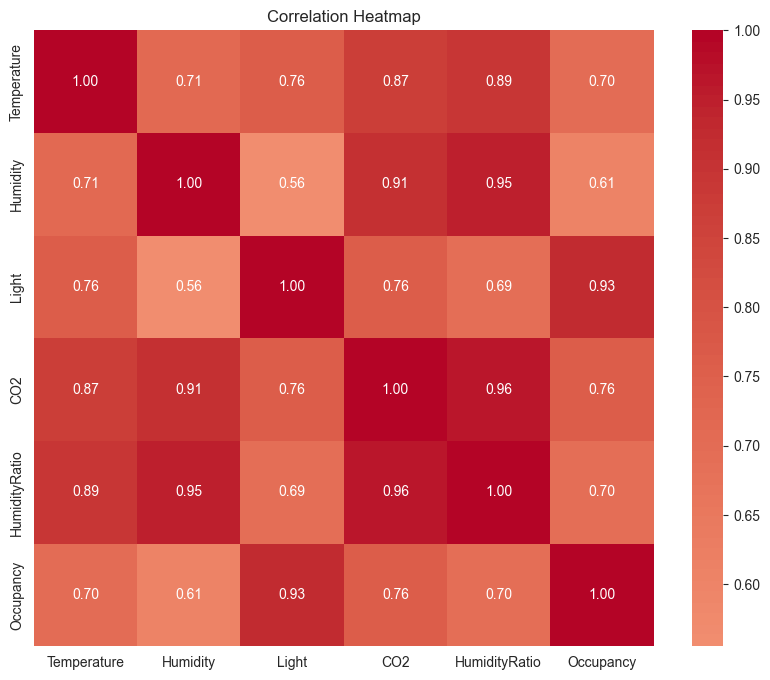

In [29]:
# Step 1: compute correlation matrix
corr = df.corr(numeric_only=True)  # numeric_only avoids issues with non-numeric columns

# Step 2: plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Training our Model
To build a predictive model for determining whether a room is occupied, we will use Logistic Regression. A Random Forest Classifier could also be applied and may provide good results, but it is slightly more computationally intensive to train.

In [30]:
#Lets drop the columns for humidity, light, and humidity ratio so we can work with a smaller dataset to train our model
df = df.drop(["Humidity", "Light", "HumidityRatio"], axis=1)

In [31]:
#Now lets double check our dataset
df.head()

,Temperature,CO2,Occupancy
0,23.7000,749.200000,1
1,23.7180,760.400000,1
2,23.7300,769.666667,1
3,23.7225,774.750000,1
4,23.7540,779.000000,1


In [32]:
#Now Lets split our data so we can test it once we train it.
from sklearn.model_selection import train_test_split

X = df[["Temperature", "CO2"]]
y = df["Occupancy"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [33]:
#Now we'll actually train our logistic regression model(we could use random forest as well but logistic is more straightforward
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [34]:
#Finally...lets evaluate our model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.874274661508704
[[288  27]
 [ 38 164]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       315
           1       0.86      0.81      0.83       202

    accuracy                           0.87       517
   macro avg       0.87      0.86      0.87       517
weighted avg       0.87      0.87      0.87       517



We have an overall accuracy of 87% which is pretty solid considering we got rid of the light column in our dataset. Finally below lets visualize our results with a confusion matrix.

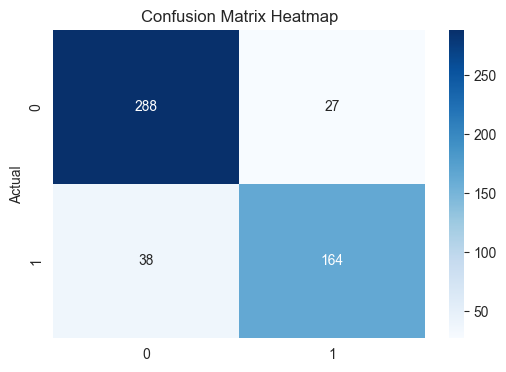

In [39]:
import seaborn as sns
#lets make a confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d",cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()


## Conclusion:
While our Logistic Regression model achieved an overall accuracy of 87 percent, it is important to note that it performs slightly better at predicting unoccupied rooms (0) than occupied rooms (1). This difference in performance is likely influenced by the distribution of the dataset, and could potentially be improved by collecting a more balanced dataset with roughly equal representation of occupied and unoccupied instances. Additionally, it should be noted that the model was not trained on all available variables. Although our dataset includes temperature, humidity, light, CO2 levels, and humidity ratio, we limited our training to only CO2 levels and temperature to predict occupancy. Including more features in future iterations of the model could provide further insights and improve predictive accuracy.